In [ ]:
import torchvision
import time
import torch
import matplotlib.pyplot as plt

In [ ]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

In [ ]:
mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = torchvision.datasets.MNIST('.', train=False, transform=transform, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
mnist_train[1][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 

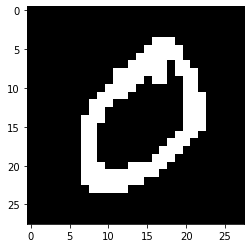

In [ ]:
plt.imshow(mnist_train[1][0].reshape(28, -1), cmap='gray', vmin=0, vmax=1)

In [ ]:
x_5 = mnist_train.data[mnist_train.train_labels==1]

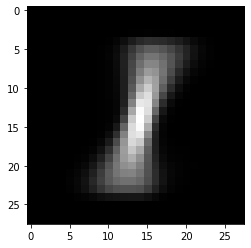

In [ ]:
plt.imshow(x_5.sum(axis=0)/x_5.sum(axis=0).max(),cmap='gray')



---



**Вытаскиваем и разделяем признаки и метки для 0 и 1**

In [ ]:
train_features = []
train_labels = []

In [ ]:
for i,j in mnist_train:
  if j < 2:
    train_features.append(i)
    train_labels.append(j)

In [ ]:
len(train_labels)

12665

In [ ]:
len(train_features)

12665



---



In [ ]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
num_inputs = len(df.columns)-1
num_examples = len(df.iloc[:])
true_w = torch.tensor([2,-3.4,3,6,4,-3.4,2,-3.4,3,-6,4,3.4,2.2])
true_b = 4.2
features = torch.randn((num_examples, num_inputs))
labels = torch.mv(features, true_w) + true_b
labels += torch.randn(labels.shape)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
batch_size = 10
dataset = TensorDataset(features, labels)
# Randomly reading mini-batches
data_iter = DataLoader(dataset, batch_size, shuffle=True)

In [ ]:
# Read a batch to see how it works
for X, y in data_iter:
    print(X, y)
    break

tensor([[-1.4791e+00,  1.9057e+00, -4.8827e-01,  2.3426e-01,  1.2979e-01,
          1.1062e+00,  5.8955e-01, -3.0606e-01,  2.1589e-01, -1.7899e-01,
          1.6014e+00,  1.5755e+00,  2.7531e-01],
        [ 9.1366e-01, -1.1017e+00, -8.1206e-01,  7.8001e-01,  1.0092e+00,
         -1.3098e+00, -1.0985e+00,  5.5234e-01, -3.3761e-01, -8.6655e-01,
         -3.8272e-01, -5.1587e-02, -8.1193e-01],
        [ 3.1526e-01,  1.6295e+00, -8.9244e-01, -7.2806e-01, -2.4616e-01,
         -1.0537e+00, -1.1314e+00,  8.9474e-02,  5.7259e-01, -2.1859e-01,
          6.7162e-01, -3.8240e-01, -5.6021e-01],
        [-5.0871e-01,  2.6063e-01, -6.9755e-01, -2.5080e-03, -1.0602e+00,
          7.8403e-01, -1.6311e-01,  1.5477e-01, -4.5895e-01, -1.6408e+00,
         -5.2243e-01, -4.7161e-01, -7.5000e-01],
        [ 6.2380e-01, -3.1979e-02,  9.6591e-01, -1.3261e+00, -3.9211e-01,
         -9.0193e-01, -1.0851e+00, -7.9745e-02,  2.8568e-01,  8.1166e-01,
         -2.3646e-01, -4.1609e-01, -4.7029e-01],
        [ 4.279

In [ ]:
model = torch.nn.Sequential(torch.nn.Linear(13, 1))

In [ ]:
model

Sequential(
  (0): Linear(in_features=13, out_features=1, bias=True)
)

In [ ]:
loss = torch.nn.MSELoss(reduction='mean')

In [ ]:
trainer = torch.optim.SGD(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 100
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        trainer.zero_grad()
        l = loss(model(X).reshape(-1), y)
        l.backward()
        trainer.step()
    l = loss(model(features).reshape(-1), labels)
    if epoch % 5 == 0:
        print(f'epoch {epoch}, loss: {l.item()}')
#        print('|\tw', model[0].weight.data)
#        print('|\tb', model[0].bias.data)


epoch 5, loss: 74.26777648925781
epoch 10, loss: 26.201295852661133
epoch 15, loss: 9.868535041809082
epoch 20, loss: 4.166195869445801
epoch 25, loss: 2.1511471271514893
epoch 30, loss: 1.4213674068450928
epoch 35, loss: 1.151437759399414
epoch 40, loss: 1.0492825508117676
epoch 45, loss: 1.010261058807373
epoch 50, loss: 0.994845449924469
epoch 55, loss: 0.9887411594390869
epoch 60, loss: 0.9862027764320374
epoch 65, loss: 0.9851623773574829
epoch 70, loss: 0.9847078919410706
epoch 75, loss: 0.9845043420791626
epoch 80, loss: 0.9844164848327637
epoch 85, loss: 0.9843795895576477
epoch 90, loss: 0.9843620657920837
epoch 95, loss: 0.9843607544898987
epoch 100, loss: 0.9843586087226868
